## APST2 - Projet 2 - Classification avec des mélanges gaussiens

Lors de ce projet, nous avons choisi d'étudier les données du premier tour des élections présidentielles de 2022.

### Importation des données

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Pour commencer, nous avons préparé la mise en forme des données sous la forme de tableau. Nous avons recopié les noms des colonnes attendus après le chargement des données :

In [2]:
col_commun=['Code de la région','Libellé de la région','Etat saisie','Inscrits',
     'Abstentions','% Abs/Ins','Votants','% Vot/Ins','Blancs','% Blancs/Ins',
     '% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins',
     '% Exp/Vot']
col_spec=['Sexe','Nom','Prénom','Voix','% Voix/Ins','% Voix/Exp']

nom_cols = []
for i in range(89):
    if i < len(col_commun):
        nom = col_commun[i]
    else:
        j = (i-len(col_commun)) % len(col_spec)
        k = (i-len(col_commun)) // len(col_spec)
        nom = col_spec[j] + " " + str(k)
    nom_cols.append(nom)
np.array(nom_cols)

array(['Code de la région', 'Libellé de la région', 'Etat saisie',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'Sexe 0',
       'Nom 0', 'Prénom 0', 'Voix 0', '% Voix/Ins 0', '% Voix/Exp 0',
       'Sexe 1', 'Nom 1', 'Prénom 1', 'Voix 1', '% Voix/Ins 1',
       '% Voix/Exp 1', 'Sexe 2', 'Nom 2', 'Prénom 2', 'Voix 2',
       '% Voix/Ins 2', '% Voix/Exp 2', 'Sexe 3', 'Nom 3', 'Prénom 3',
       'Voix 3', '% Voix/Ins 3', '% Voix/Exp 3', 'Sexe 4', 'Nom 4',
       'Prénom 4', 'Voix 4', '% Voix/Ins 4', '% Voix/Exp 4', 'Sexe 5',
       'Nom 5', 'Prénom 5', 'Voix 5', '% Voix/Ins 5', '% Voix/Exp 5',
       'Sexe 6', 'Nom 6', 'Prénom 6', 'Voix 6', '% Voix/Ins 6',
       '% Voix/Exp 6', 'Sexe 7', 'Nom 7', 'Prénom 7', 'Voix 7',
       '% Voix/Ins 7', '% Voix/Exp 7', 'Sexe 8', 'Nom 8', 'Prénom 8',
       'Voix 8', '% Voix/Ins 8', '% Voix/Exp 8'

Pour simplifier, on choisit de noter : Abs pour le nombre d'absents, Ins pour le nombre d'inscrits, Vot pour le nombre de votants, Blancs pour le nombre de votes blancs, Nuls pour le nombre de votes nuls et Exp pour le nombre de votes exprimés.

In [3]:
url = "https://www.data.gouv.fr/fr/datasets/r/cbf026c5-e0bf-4ff8-b1cd-eb994cd26290"

data = pd.read_csv(url, sep=";",encoding="latin", header=0, names=nom_cols)
data2 = data[['% Abs/Ins', '% Vot/Ins',
       '% Blancs/Ins', '% Blancs/Vot', '% Nuls/Ins',
       '% Nuls/Vot', '% Exp/Ins', '% Exp/Vot', '% Voix/Ins 0', '% Voix/Exp 0',
       '% Voix/Ins 1', '% Voix/Exp 1',
       '% Voix/Ins 2', '% Voix/Exp 2',
       '% Voix/Ins 3', '% Voix/Exp 3',
       '% Voix/Ins 4', '% Voix/Exp 4', 
       '% Voix/Ins 5', '% Voix/Exp 5',
       '% Voix/Ins 6', '% Voix/Exp 6',
       '% Voix/Ins 7', '% Voix/Exp 7', 
       '% Voix/Ins 8', '% Voix/Exp 8', 
       '% Voix/Ins 9', '% Voix/Exp 9', 
       '% Voix/Ins 10', '% Voix/Exp 10',
       '% Voix/Ins 11', '% Voix/Exp 11']].stack().str.replace(',','.').unstack()

Après la lecture des données, on garde les colonnes que nous allons étudier dans le tableau data 2 :

In [4]:
data2

,% Abs/Ins,% Vot/Ins,% Blancs/Ins,% Blancs/Vot,% Nuls/Ins,% Nuls/Vot,% Exp/Ins,% Exp/Vot,% Voix/Ins 0,% Voix/Exp 0,...,% Voix/Ins 7,% Voix/Exp 7,% Voix/Ins 8,% Voix/Exp 8,% Voix/Ins 9,% Voix/Exp 9,% Voix/Ins 10,% Voix/Exp 10,% Voix/Ins 11,% Voix/Exp 11
0,26.10,73.90,1.09,1.48,0.48,0.65,72.32,97.87,0.48,0.67,...,1.04,1.43,2.90,4.01,3.13,4.33,0.58,0.80,1.94,2.68
1,21.57,78.43,1.20,1.53,0.61,0.77,76.63,97.70,0.41,0.54,...,1.73,2.26,3.40,4.44,3.52,4.60,0.73,0.95,1.52,1.98
2,22.10,77.90,1.26,1.62,0.46,0.59,76.18,97.79,0.42,0.55,...,1.40,1.83,4.04,5.31,3.92,5.15,0.55,0.72,1.77,2.33
3,22.92,77.08,1.32,1.72,0.58,0.76,75.17,97.52,0.53,0.71,...,1.33,1.77,3.02,4.02,3.85,5.12,0.64,0.85,1.94,2.58
4,21.21,78.79,1.24,1.58,0.52,0.66,77.03,97.76,0.51,0.66,...,1.70,2.21,4.77,6.19,3.62,4.70,0.78,1.01,1.37,1.78
5,25.01,74.99,1.26,1.69,0.51,0.68,73.22,97.64,0.50,0.69,...,1.26,1.72,2.96,4.04,3.90,5.33,0.61,0.83,1.73,2.36
6,23.96,76.04,1.04,1.37,0.38,0.50,74.62,98.13,0.30,0.40,...,1.07,1.43,4.03,5.40,4.62,6.19,0.45,0.60,1.19,1.59
7,21.75,78.25,1.11,1.42,0.58,0.74,76.57,97.85,0.34,0.45,...,1.78,2.33,3.22,4.20,2.99,3.90,0.55,0.72,1.46,1.91
8,26.94,73.06,1.01,1.38,0.57,0.78,71.48,97.84,0.49,0.69,...,0.96,1.34,2.24,3.13,2.53,3.53,0.50,0.69,1.30,1.82
9,24.48,75.52,1.20,1.59,0.44,0.58,73.89,97.83,0.53,0.72,...,1.25,1.70,3.04,4.11,3.31,4.47,0.66,0.90,1.60,2.16


Les données sont réparties sur 18 lignes correspondant aux régions françaises. On a gardé les pourcentages généraux sur les élections dans chaque région (colonnes 0 à 7) puis le pourcentage de voix de chaque candidat (candidat 0 à 11) par rapport au nombre total d'inscrits et de votes exprimés.

In [5]:
tp = data2.get(["% Voix/Exp 0", "% Voix/Exp 1", "% Voix/Exp 2", "% Voix/Exp 3", "% Voix/Exp 4", "% Voix/Exp 5", "% Voix/Exp 6",
                "% Voix/Exp 7", "% Voix/Exp 8", "% Voix/Exp 9", "% Voix/Exp 10", "% Voix/Exp 11",
               "% Voix/Ins 0", "% Voix/Ins 1", "% Voix/Ins 2", "% Voix/Ins 3", "% Voix/Ins 4", "% Voix/Ins 5", "% Voix/Ins 6",
                "% Voix/Ins 7", "% Voix/Ins 8", "% Voix/Ins 9", "% Voix/Ins 10", "% Voix/Ins 11"])
tp2 = data2.get(["% Voix/Exp 0", "% Voix/Ins 0",
                "% Voix/Exp 1", "% Voix/Ins 1",
                "% Voix/Exp 2", "% Voix/Ins 2",
                 "% Voix/Exp 3", "% Voix/Ins 3",
                 "% Voix/Exp 4", "% Voix/Ins 4",
                 "% Voix/Exp 5", "% Voix/Ins 5",
                 "% Voix/Exp 6", "% Voix/Ins 6",
                 "% Voix/Exp 7", "% Voix/Ins 7",
                 "% Voix/Exp 8", "% Voix/Ins 8",
                 "% Voix/Exp 9", "% Voix/Ins 9",
                 "% Voix/Exp 10", "% Voix/Ins 10",
                 "% Voix/Exp 11", "% Voix/Ins 11"])
x = tp2.to_numpy(dtype=float)

In [6]:
x.shape

(18, 24)

Nous avons choisi de conserver seulement les colonnes des résultats des candidats, stockées dans x, un tableau numpy.

On peut maintenant représenter graphiquement les données :

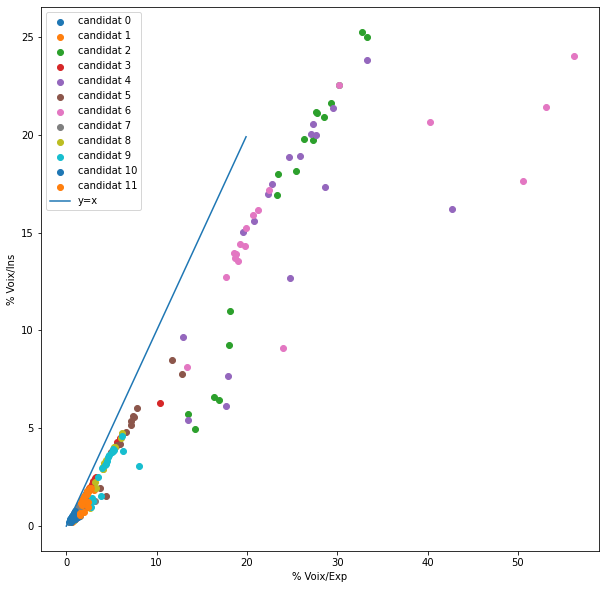

In [98]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.scatter(x[:,2*i],x[:,2*i+1], label=f"candidat {i}")
t=np.arange(0,20,0.1)
plt.plot(t,t, label="y=x")
plt.ylabel("% Voix/Ins")
plt.xlabel("% Voix/Exp")
plt.legend();

On observe que les données sont cohérentes car le pourcentage de voix par rapport aux votes exprimés est supérieur que celui par rapport aux inscrits.
Les candidats qui ont reçu le plus haut pourcentage de voix correspondent, dans notre cas, aux candidats 2, 6 et 4.
On observe un cluster de points autour des petits pourcentages : la plupart des 9 autres candidats ont reçu moins de 10% des votes.
Finalement, on voit que certains points sont assez éloignés de la droite y=x tracée en bleu. Ces points peuvent fausser la suite de notre analyse et correspondent aux régions avec de forts taux d'abstention.

In [81]:
# Code d'affichage de la représentation de l'ellipse trouvé sur le site de matplotlib
def affiche_ellipse_cov(moy, cov, ax):
    p = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + p)
    ell_radius_y = np.sqrt(1 - p)
    ellipse = Ellipse((0,0), width=ell_radius_x*2, height=ell_radius_y*2, facecolor="none",edgecolor="red")
    
    scale_x= np.sqrt(cov[0,0])*2
    scale_y= np.sqrt(cov[1,1])*2
    
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(moy[0], moy[1])
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

### Analyse des clusters

Pour la suite, on reprend les même données en changeant la taille de x :

In [8]:
y=x.reshape(18,12,2).reshape(18*12,2)

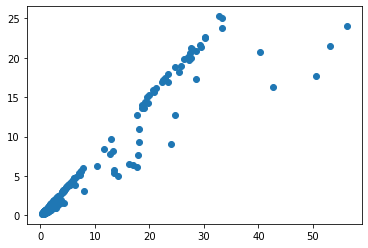

In [96]:
plt.scatter(y[:,0],y[:,1]);

Nous appliquons maintenant une analyse en composantes principales au jeu de données, en gardant 2 composantes principales.

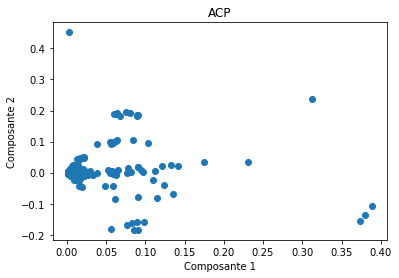

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=2).fit(y.T)
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel("Composante 1");
plt.ylabel("Composante 2");
plt.title("ACP");

In [12]:
pca.singular_values_

array([5.99227978e+01, 1.38206917e-14])

On retrouve à droite les 5 points qui semblaient correspondre aux régions d'outre-mer, avec beaucoup d'abstention. Ils ont une participation très élevée à la composante 1, et donc une part importante dans la variabilité des données. <br>
Ces points vont probablement nous gêner dans la construction d'un modèle de mélange gaussien. 
Nous allons quand même essayer de construire un modèle avec ces régions, puis nous allons le comparer à un modèle où elles n'apparaissent pas.

Nous utilisons ensuite un mélange gaussien avec 3 composantes pour essayer de représenter les clusters des données obtenues après la PCA. Nous avons choisi 3 arbitrairement, en observant la répartition des données.

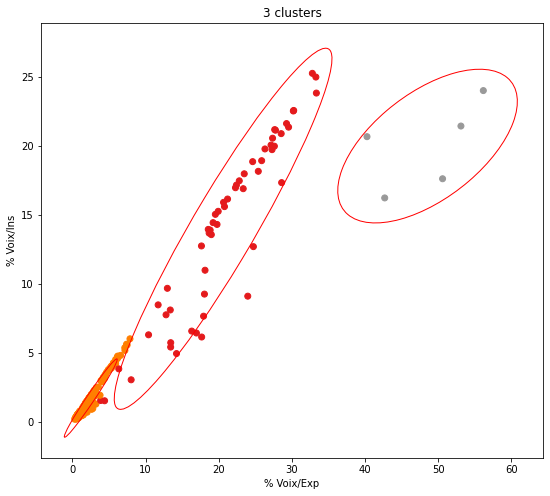

In [117]:
from sklearn.mixture import GaussianMixture

res=GaussianMixture(n_components=3).fit(y)
clust = res.predict(y)

fig, ax=plt.subplots(1,1,figsize=(9,8))
plt.scatter(y[:,0],y[:,1], c=clust)

for k in range(3):
    affiche_ellipse_cov(res.means_[k], res.covariances_[k], ax)

plt.ylabel("% Voix/Ins");
plt.xlabel("% Voix/Exp");
plt.title("3 clusters");

Ici, le mélange gaussien a séparé les données entre un cluster de petits pourcentages, un cluster pour des points de plus hauts pourcentages et proches de la droite `y=x` et un cluster correspondant aux données plus éloignées de `y=x` à cause du faible taux de votants. On utilise maintenant les critères AIC et BIC pour sélectionner le meilleur nombre de composantes du mélange gaussien :

D:\Logiciels\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


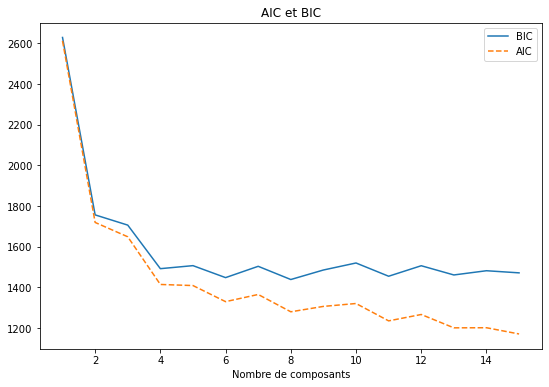

In [99]:
AIC, BIC = [], []

for i in range(1,16):
    res=GaussianMixture(n_components=i).fit(y)
    AIC.append(res.aic(y))
    BIC.append(res.bic(y))

t=range(1,16)
plt.figure(figsize=(9,6))
plt.plot(t, BIC, label="BIC")
plt.xlabel("Nombre de composants")
plt.plot(t,AIC, "--", label="AIC")
plt.title("AIC et BIC");
plt.legend();

In [100]:
m1,m2 = np.argmin(BIC), np.argmin(AIC)
print("BIC minimal pour", m1+1, "composantes, valeur correspondante du BIC :", BIC[m1], "-- de l'AIC :", AIC[m1])
print("AIC minimal pour", m2+1, "composantes, valeur correspondante du BIC :", BIC[m2], "-- de l'AIC :", AIC[m2])

print(f"\nLe facteur BIC est minimal pour {m1+1} composantes du mélange gaussien, on a le résultat suivant :")

BIC minimal pour 8 composantes, valeur correspondante du BIC : 1438.8183061264644 -- de l'AIC : 1280.1802209653088
AIC minimal pour 15 composantes, valeur correspondante du BIC : 1471.5709056426192 -- de l'AIC : 1171.1711273587284

Le facteur BIC est minimal pour 8 composantes du mélange gaussien, on a le résultat suivant :


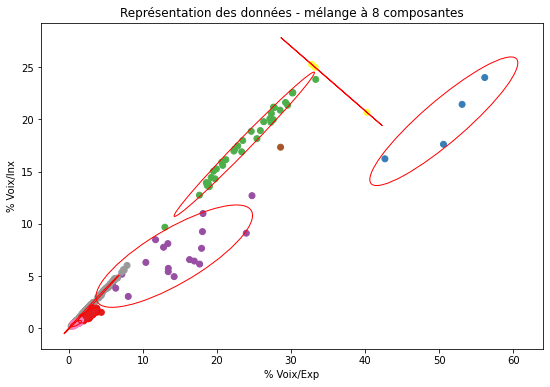

In [101]:
res = GaussianMixture(n_components=m1+1).fit(y)
clust = res.predict(y)

_, ax= plt.subplots(1,1,figsize=(9,6))
plt.scatter(y[:,0], y[:,1], c=clust, cmap=plt.get_cmap('Set1'));

for k in range(m1+1):
    affiche_ellipse_cov(res.means_[k], res.covariances_[k], ax)

plt.title(f"Représentation des données - mélange à {m1+1} composantes");
plt.ylabel("% Voix/Inx")
plt.xlabel("% Voix/Exp");

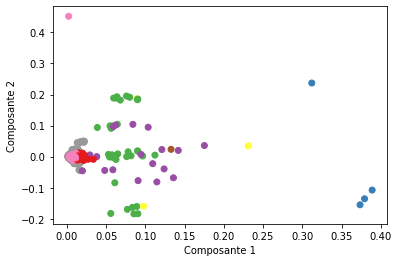

In [102]:
pca=PCA(n_components=2).fit(y.T)
plt.set_cmap('Set1')
plt.scatter(pca.components_[0], pca.components_[1], c=clust);
plt.xlabel("Composante 1");
plt.ylabel("Composante 2");

On voit qu'effectivement, les groupes qui étaient éloignés sur la représentation des données se retrouvent éloignés sur l'ACP. On va maintenant essayer de voir comment se comporte le mélange gaussien en enlevant ces groupes.

## Sans les régions d'outre-mer

In [62]:
# On retire les lignes correspondant aux régions d'outre-mer
data2_sro=data2.drop([13, 14, 15, 16, 17], axis=0)
data2_sro

,% Abs/Ins,% Vot/Ins,% Blancs/Ins,% Blancs/Vot,% Nuls/Ins,% Nuls/Vot,% Exp/Ins,% Exp/Vot,% Voix/Ins 0,% Voix/Exp 0,...,% Voix/Ins 7,% Voix/Exp 7,% Voix/Ins 8,% Voix/Exp 8,% Voix/Ins 9,% Voix/Exp 9,% Voix/Ins 10,% Voix/Exp 10,% Voix/Ins 11,% Voix/Exp 11
0,26.10,73.90,1.09,1.48,0.48,0.65,72.32,97.87,0.48,0.67,...,1.04,1.43,2.90,4.01,3.13,4.33,0.58,0.80,1.94,2.68
1,21.57,78.43,1.20,1.53,0.61,0.77,76.63,97.70,0.41,0.54,...,1.73,2.26,3.40,4.44,3.52,4.60,0.73,0.95,1.52,1.98
2,22.10,77.90,1.26,1.62,0.46,0.59,76.18,97.79,0.42,0.55,...,1.40,1.83,4.04,5.31,3.92,5.15,0.55,0.72,1.77,2.33
3,22.92,77.08,1.32,1.72,0.58,0.76,75.17,97.52,0.53,0.71,...,1.33,1.77,3.02,4.02,3.85,5.12,0.64,0.85,1.94,2.58
4,21.21,78.79,1.24,1.58,0.52,0.66,77.03,97.76,0.51,0.66,...,1.70,2.21,4.77,6.19,3.62,4.70,0.78,1.01,1.37,1.78
5,25.01,74.99,1.26,1.69,0.51,0.68,73.22,97.64,0.50,0.69,...,1.26,1.72,2.96,4.04,3.90,5.33,0.61,0.83,1.73,2.36
6,23.96,76.04,1.04,1.37,0.38,0.50,74.62,98.13,0.30,0.40,...,1.07,1.43,4.03,5.40,4.62,6.19,0.45,0.60,1.19,1.59
7,21.75,78.25,1.11,1.42,0.58,0.74,76.57,97.85,0.34,0.45,...,1.78,2.33,3.22,4.20,2.99,3.90,0.55,0.72,1.46,1.91
8,26.94,73.06,1.01,1.38,0.57,0.78,71.48,97.84,0.49,0.69,...,0.96,1.34,2.24,3.13,2.53,3.53,0.50,0.69,1.30,1.82
9,24.48,75.52,1.20,1.59,0.44,0.58,73.89,97.83,0.53,0.72,...,1.25,1.70,3.04,4.11,3.31,4.47,0.66,0.90,1.60,2.16


In [103]:
tp2_sro = data2_sro.get(["% Voix/Exp 0", "% Voix/Ins 0",
                "% Voix/Exp 1", "% Voix/Ins 1",
                "% Voix/Exp 2", "% Voix/Ins 2",
                 "% Voix/Exp 3", "% Voix/Ins 3",
                 "% Voix/Exp 4", "% Voix/Ins 4",
                 "% Voix/Exp 5", "% Voix/Ins 5",
                 "% Voix/Exp 6", "% Voix/Ins 6",
                 "% Voix/Exp 7", "% Voix/Ins 7",
                 "% Voix/Exp 8", "% Voix/Ins 8",
                 "% Voix/Exp 9", "% Voix/Ins 9",
                 "% Voix/Exp 10", "% Voix/Ins 10",
                 "% Voix/Exp 11", "% Voix/Ins 11"])
x_sro = tp2_sro.to_numpy(dtype=float)

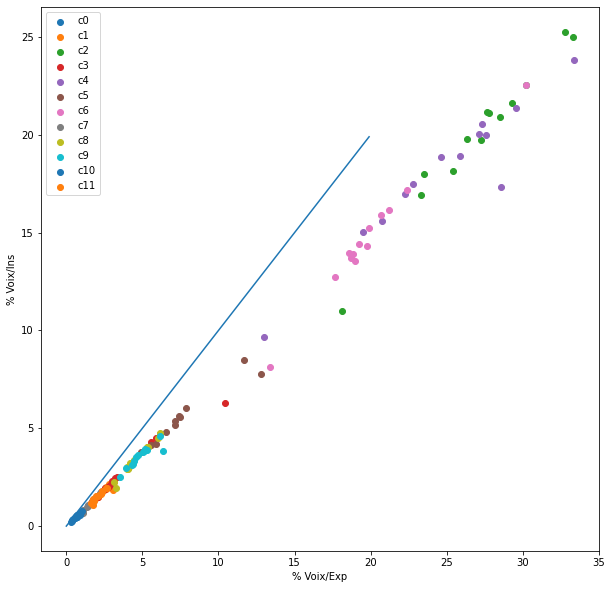

In [118]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.scatter(x_sro[:,2*i],x_sro[:,2*i+1], label=f"c{i}")
t=np.arange(0,20,0.1)
plt.plot(t,t)
plt.ylabel("% Voix/Ins")
plt.xlabel("% Voix/Exp")
plt.legend();

On observe déjà que les données sont plus alignées, sans les régions d'outre-mer.

In [105]:
y_sro=x_sro.reshape(13,12,2).reshape(13*12,2)

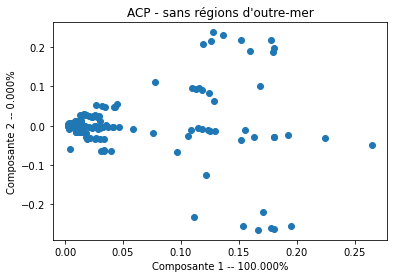

In [106]:
y_scaled=StandardScaler().fit_transform(y_sro)
pca=PCA(n_components=2).fit(y_sro.T)
plt.scatter(pca.components_[0], pca.components_[1])
plt.title("ACP - sans régions d'outre-mer")
plt.xlabel(f"Composante 1 -- {pca.explained_variance_ratio_[0]*100:.3f}%");
plt.ylabel(f"Composante 2 -- {pca.explained_variance_ratio_[1]*100:.3f}%");

Ici, on n'a plus de données parasites qui affectent trop la variabilité.

Les pourcentages représentent à quel point les directions caractérisent la variance des données. On voit que la première direction principale explique la totalité de la variance. C'est attendu, puisque les données sont quasiment alignées sur le graphique un peu plus haut.

On applique maintenant un modèle de mélange gaussien, à trois composantes.

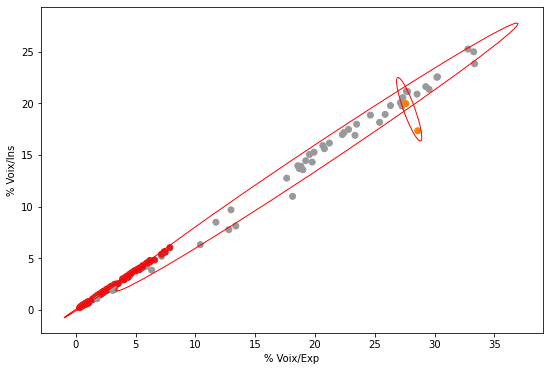

In [120]:
res=GaussianMixture(n_components=3).fit(y_sro)
clust = res.predict(y_sro)

_, ax=plt.subplots(1,1,figsize=(9,6))
plt.scatter(y_sro[:,0],y_sro[:,1], c=clust)

for k in range(3):
    affiche_ellipse_cov(res.means_[k], res.covariances_[k], ax)

plt.ylabel("% Voix/Ins")
plt.xlabel("% Voix/Exp");

On a peu ou prou le même découpage que précédemment.

D:\Logiciels\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


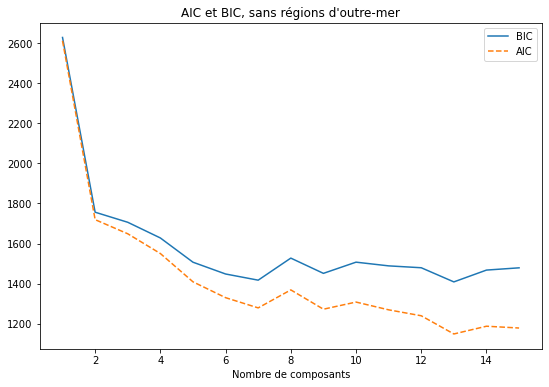

In [132]:
AIC_sro, BIC_sro = [], []

for i in range(1,16):
    res=GaussianMixture(n_components=i).fit(y)
    AIC_sro.append(res.aic(y))
    BIC_sro.append(res.bic(y))

t=range(1,16)
plt.figure(figsize=(9,6))
plt.plot(t, BIC_sro, label="BIC")
plt.xlabel("Nombre de composants")
plt.plot(t, AIC_sro, "--", label="AIC")
plt.title("AIC et BIC, sans régions d'outre-mer");
plt.legend();

In [133]:
m1_sro,m2_sro = np.argmin(BIC_sro), np.argmin(AIC_sro)
print("BIC minimal pour", m1_sro+1, "composantes, valeur correspondante du BIC :", BIC_sro[m1], "-- de l'AIC :", AIC_sro[m1_sro])
print("AIC minimal pour", m2_sro+1, "composantes, valeur correspondante du BIC :", BIC_sro[m2], "-- de l'AIC :", AIC_sro[m2_sro])

print(f"\nLe facteur BIC est minimal pour {m1_sro+1} composantes du mélange gaussien, on a le résultat suivant :")

BIC minimal pour 13 composantes, valeur correspondante du BIC : 1527.4390425694182 -- de l'AIC : 1148.8032804059908
AIC minimal pour 13 composantes, valeur correspondante du BIC : 1478.9142145824155 -- de l'AIC : 1148.8032804059908

Le facteur BIC est minimal pour 13 composantes du mélange gaussien, on a le résultat suivant :


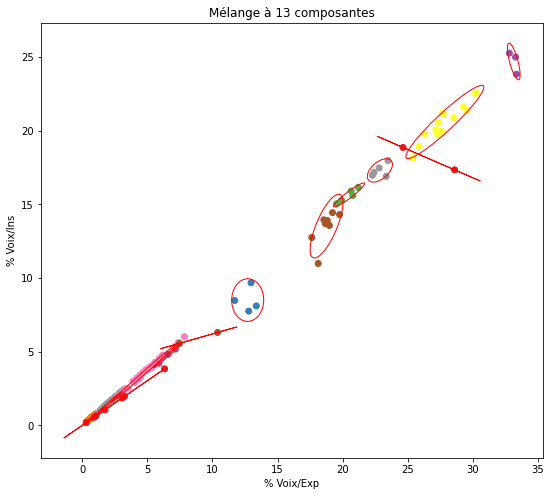

In [134]:
res=GaussianMixture(n_components=m1_sro+1).fit(y_sro)
clust = res.predict(y_sro)

_, ax = plt.subplots(1,1,figsize=(9,8))
plt.scatter(y_sro[:,0],y_sro[:,1], c=clust);

for k in range(m1_sro+1):
    affiche_ellipse_cov(res.means_[k], res.covariances_[k], ax)
    
plt.title(f"Mélange à {m1_sro+1} composantes")
plt.xlabel("% Voix/Exp")
plt.ylabel("% Voix/Ins");

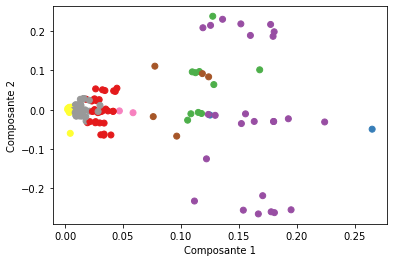

In [129]:
pca_cand=PCA(n_components=2).fit_transform(y_sro.T)
plt.scatter(pca.components_[0], pca.components_[1], c=clust);
plt.xlabel("Composante 1");
plt.ylabel("Composante 2");

On voit que certaines composantes du mélange se chevauchent, à cause du nombre important de clusters. On remarque qu'on a eu besoin de plus de clusters pour caractériser le mélange par rapport aux données avec toutes les régions, donc le modèle est maintenant plus complexe à décrire.

Finalement, il serait difficile d'effectuer des prédictions sur ces données présidentielles avec un mélange gaussien puisqu'on a besoin de 8 composantes avec toutes les régions, ou 13 composantes en enlevant certaines régions, pour caractériser les clusters.